In [78]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [79]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels), (test_images , test_labels) = fashion_mnist.load_data()


In [80]:
train_images.shape

(60000, 28, 28)

In [81]:
test_images.shape

(10000, 28, 28)

In [82]:
train_images[0,23,23]

194

In [83]:
train_labels[:10]


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [84]:
class_name = ['T-shirt/top' , 'Trouser' ,  'Pullover', 'Dress', 'Coat'  , 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot']

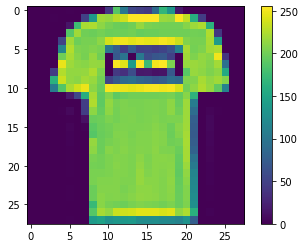

In [85]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [86]:
train_images = train_images/ 255.0
test_images  = test_images / 255.0

In [87]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape= (28,28)))
model.add(tf.keras.layers.Dense(128 ,activation = 'relu'))
model.add(tf.keras.layers.Dense(10 ,activation = 'softmax'))


In [88]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images , train_labels ,epochs= 8)

Epoch 1/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4979 - accuracy: 0.8239
Epoch 2/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3756 - accuracy: 0.8646
Epoch 3/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3385 - accuracy: 0.8761
Epoch 4/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3141 - accuracy: 0.8846
Epoch 5/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2948 - accuracy: 0.8930
Epoch 6/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2804 - accuracy: 0.8967
Epoch 7/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9011
Epoch 8/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2577 - accuracy: 0.9050


In [89]:
test_loss , test_acc = model.evaluate(test_images  , test_label , verbose=1)
print('Test accuracy : '   ,test_acc)

313/313 [==============================] - 0s 853us/step - loss: 0.3475 - accuracy: 0.8775
Test accuracy :  0.8774999976158142


Pullover


<Figure size 432x288 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

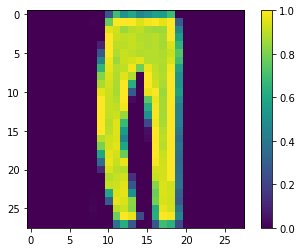

In [90]:
predictions = model.predict(test_images)
print(class_name[np.argmax(predictions[1])])
plt.figure()
plt.show()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show

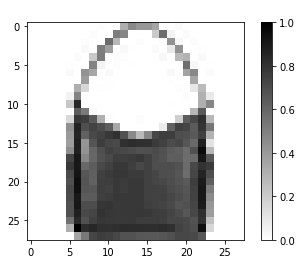

In [96]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model , image , correct_label):
    class_names = ['T-shirt/top' , 'Trouser' ,  'Pullover', 'Dress', 'Coat'  , 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class= class_names[np.argmax(prediction)]
    show_image(image , class_names[correct_label] , predicted_class)


def show_image(img, label , guess):
    plt.figure()
    plt.imshow(img,cmap = plt.cm.binary)
    plt.title("Excepted :"  + label)
    plt.xlabel("Guess: :" +  guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input("pick a number : ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <=1000:
                return int(num)
        else:
            print('try again...')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image , label)